In [1]:
#Import Libiraries
import numpy as np
import pandas as pd
import matplotlib as plt

# **Load the DataSet**

In [2]:
df = pd.read_csv('../input/years-of-experience-and-salary-dataset/Salary_Data.csv')

# **Basic Information about DataFrame**

In [3]:
#check shape of data
df.shape

(30, 2)

**30 Row And 2 Column**

In [4]:
#View the first five row from the data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#View the last five row from data
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
#view one sample from data
df.sample()

,YearsExperience,Salary
9,3.7,57189.0


In [7]:
#view 10 random sample form data
df.sample(10)

,YearsExperience,Salary
27,9.6,112635.0
20,6.8,91738.0
6,3.0,60150.0
4,2.2,39891.0
14,4.5,61111.0
13,4.1,57081.0
25,9.0,105582.0
15,4.9,67938.0
29,10.5,121872.0
26,9.5,116969.0


In [8]:
#view mean
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [9]:
#some statistic from dataset
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
#check the datatype of features
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [11]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
df.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

# **Data Cleaning**

**Drop the Duplicates**

In [13]:
df.shape

(30, 2)

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(30, 2)

In [16]:
#Check the Null Values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
#Create Dependant (y) and Independant (x) values
target_feature = 'Salary'
#separate object of target feature
Y = df[target_feature]
#separate object of Dependant feature X
X=df.drop(target_feature , axis=1)

In [18]:
df.shape

(30, 2)

In [19]:
#Dependant feature
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [20]:
#Target
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [21]:
Y.shape

(30,)

# Data Visualization before train the Model

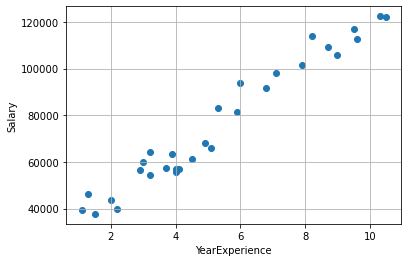

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.grid()
plt.show()

# Split DataSet to Train and Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#test_size= 0.3
#train data is 70%
#test data is 30% from all Data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [25]:
x_train.shape , y_train.shape

((21, 1), (21,))

In [26]:
x_test.shape , y_test.shape

((9, 1), (9,))

# Apply Linear Regration on Train DataSet

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg= LinearRegression()

In [29]:
reg.fit(x_train , y_train)

LinearRegression()

# Get the Parameters

In [30]:
#y = m x + b
# b is intercept parameter
# m is coefficient (slope)
inter = reg.intercept_
coe = reg.coef_
print('Intercept (b) is : ' ,inter )
print('coefficien (m) is : ' , coe)

Intercept (b) is :  26777.391341197632
coefficien (m) is :  [9360.26128619]


# Apply the Model on test dataset to get the predict the values

In [31]:
y_pred = reg.predict(x_test)

In [32]:
y_pred.shape

(9,)

# To Compare The Actual values and the Predict values

In [33]:
df1 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df1

,Actual,Predict
2,37731.0,40817.783270
28,122391.0,123188.082589
13,57081.0,65154.462615
10,63218.0,63282.410357
26,116969.0,115699.873560
24,109431.0,108211.664531
27,112635.0,116635.899689
11,55794.0,64218.436486
17,83088.0,76386.776158


In [34]:
df2=pd.DataFrame({'Actual':y_test , 'Predict': y_pred , 'Variance' : y_test-y_pred})


In [35]:
df2

,Actual,Predict,Variance
2,37731.0,40817.783270,-3086.783270
28,122391.0,123188.082589,-797.082589
13,57081.0,65154.462615,-8073.462615
10,63218.0,63282.410357,-64.410357
26,116969.0,115699.873560,1269.126440
24,109431.0,108211.664531,1219.335469
27,112635.0,116635.899689,-4000.899689
11,55794.0,64218.436486,-8424.436486
17,83088.0,76386.776158,6701.223842


In [36]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Prediction

In [37]:
#predicting the result os 1.5 Years Experence
pred = np.array([1.5]).reshape(-1,1)

In [38]:
reg.predict(pred)

array([40817.78327049])

In [39]:
#y=m*x+b
y=9360.26128619*1.5+26777.391341197632
print(y)

40817.78327048263


# Visualization

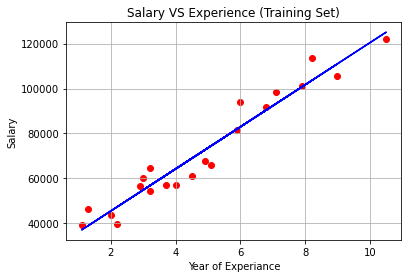

In [40]:
#Visualizing our training model
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train , reg.predict(x_train) , color='blue')
plt.title('Salary VS Experience (Training Set)')
plt.xlabel('Year of Experiance')
plt.ylabel('Salary')
plt.grid()
plt.show()

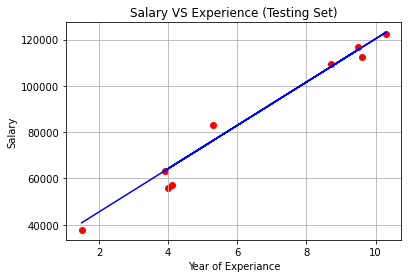

In [41]:
#Visualizing our testing model
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test , reg.predict(x_test) , color='blue')
plt.title('Salary VS Experience (Testing Set)')
plt.xlabel('Year of Experiance')
plt.ylabel('Salary')
plt.grid()
plt.show()

# Evaluation Matrics of Regrission Algorithms

In [42]:
from sklearn.metrics import r2_score
Score = r2_score(y_test ,y_pred)*100
print('Score is : ' , Score)

Score is :  97.4099340721351


In [43]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error : ' ,mean_absolute_error(y_test,y_pred) )
print('Mean Squared Error : ' ,mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ' ,np.sqrt(mean_squared_error(y_test,y_pred)))



Mean Absolute Error :  3737.4178618788987
Mean Squared Error :  23370078.800832972
Root Mean Squared Error :  4834.260936361728
